#### Problem Statement 3: Identify key patterns observed in the dataset, highlighting significant trends or correlations that provide valuable insights. At least 5 major findings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Activity_Details = pd.read_excel("Activity Details.xlsx")
print("Activity Details")
print(Activity_Details.head())

Advisors_Details = pd.read_excel("Advisors Details.xlsx")
print("\nAdvisors Details")
print(Advisors_Details.head())

Asset_Details = pd.read_excel("Asset Details.xlsx")
print("\nAsset Details")
print(Asset_Details.head())

Firm_Details = pd.read_excel("Firm Details.xlsx")
print("\nFirm Details")
print(Firm_Details.head())

Transaction_Details = pd.read_excel("Transactional Details.xlsx")
print("\nTransactional Details")
print(Transaction_Details.head())

Activity Details
   CONTACT_ID ACTIVITY TYPE ACTIVITY DATE  ACTIVITY DATE KEY
0        1153     PhoneCall    2022-06-02           20220602
1        1129          Note    2022-06-22           20220622
2        1700          Note    2022-07-21           20220721
3        1978         Email    2021-09-28           20210928
4        1978      FollowUp    2022-03-16           20220316

Advisors Details
   CONTACT ID NICK_NAME FIRST_NAME MIDDLE_NAME LAST_NAME PREFIX SUFFIX  \
0        1001       Tua       Tuan         NaN  Roettgen    NaN    NaN   
1        1002       Cha       Chad         NaN  Stofleth    Ms.    NaN   
2        1003       Arl      Arlen         NaN  Bierling    NaN    NaN   
3        1004       Oti       Otis         NaN    Mathen    NaN    NaN   
4        1005       Sun       Sung         NaN      Kiep    Mr.    NaN   

   MOBILE_PHONE  FIRM ID              PRIMARY_EMAIL UNSUBSCRIBED  \
0  554-882-3214    12087   Tuan.Roettgen@Janney.com  Not Blocked   
1  215-781-4188   

### Insight 1: Line Graph for Asset Price of different firms.<br>

We basically need Asset Prices of a Single Firm for different months.
First of all we need a table which gives details of Firms of different contact IDs

In [4]:
Advisors_Firms = Advisors_Details[['CONTACT ID', 'FIRM ID']]
df_2 = Firm_Details[['FIRM ID', 'FIRM']]
Advisors_Firms = pd.merge(Advisors_Firms, df_2, on='FIRM ID', how="left")
Advisors_Firms.head()

,CONTACT ID,FIRM ID,FIRM
0,1001,12087,Janney
1,1002,10389,Wells Fargo
2,1003,12087,Janney
3,1004,12087,Janney
4,1005,10678,UBS


In [5]:
Advisors_Firms['FIRM'].value_counts()

FIRM
Raymond James       132
UBS                 116
Janney              111
JP Morgan           110
RBC                 109
Edward Jones        108
Bofa                106
Morgan Stanley      105
Wells Fargo          99
Stark Enterprise      2
Wayne Enterprise      1
Wakanda Ltd           1
Name: count, dtype: int64

We shall use the above dataset to merge it with the Asset_Details dataset.


In [6]:
Asset_Details_With_Firms = pd.merge(Asset_Details, Advisors_Firms, left_on='CONTACT_ID', right_on='CONTACT ID', how="left")
Asset_Details_With_Firms.head()
Asset_Details_With_Firms['ASSET_MONTH_KEY'] = Asset_Details_With_Firms['ASSET_MONTH_KEY'].astype('str')
Asset_Details_With_Firms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15548 entries, 0 to 15547
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CONTACT_ID       15548 non-null  int64  
 1   ASSET_MONTH_KEY  15548 non-null  object 
 2   USD_MV           15548 non-null  float64
 3   CONTACT ID       15548 non-null  int64  
 4   FIRM ID          15548 non-null  int64  
 5   FIRM             15548 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 728.9+ KB


In [7]:
# create a list of all the firms present
firms = list(Firm_Details['FIRM'])
firms

['Raymond James',
 'RBC',
 'JP Morgan',
 'Wells Fargo',
 'Edward Jones',
 'Morgan Stanley',
 'Bofa',
 'UBS',
 'Janney',
 'Wayne Enterprise',
 'Stark Enterprise',
 'Wakanda Ltd']

We are creating a Dictionary with the keys as the firm names and values as the asset price in USD_MV

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '202106'),
  Text(1, 0, '202107'),
  Text(2, 0, '202108'),
  Text(3, 0, '202109'),
  Text(4, 0, '202110'),
  Text(5, 0, '202111'),
  Text(6, 0, '202112'),
  Text(7, 0, '202201'),
  Text(8, 0, '202202'),
  Text(9, 0, '202203'),
  Text(10, 0, '202204'),
  Text(11, 0, '202205'),
  Text(12, 0, '202206'),
  Text(13, 0, '202207'),
  Text(14, 0, '202208'),
  Text(15, 0, '202209')])

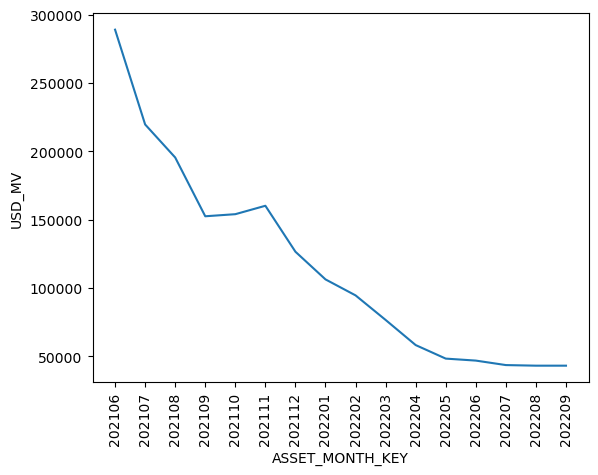

In [8]:
dat = Asset_Details_With_Firms[Asset_Details_With_Firms['CONTACT_ID']==1400].sort_values('ASSET_MONTH_KEY')
sns.lineplot(data=dat, x='ASSET_MONTH_KEY', y='USD_MV')
plt.xticks(rotation='vertical')

In [9]:
Data_Dict = {}
for firm in firms:
    Data_Set = Asset_Details_With_Firms[Asset_Details_With_Firms['FIRM']==firm]
    Data_Set = Data_Set.groupby(['ASSET_MONTH_KEY']).sum('USD_MV')
    Data_Set = Data_Set.reset_index()
    Data_Set = Data_Set[['ASSET_MONTH_KEY', 'USD_MV']]
    Data_Dict[firm] = Data_Set

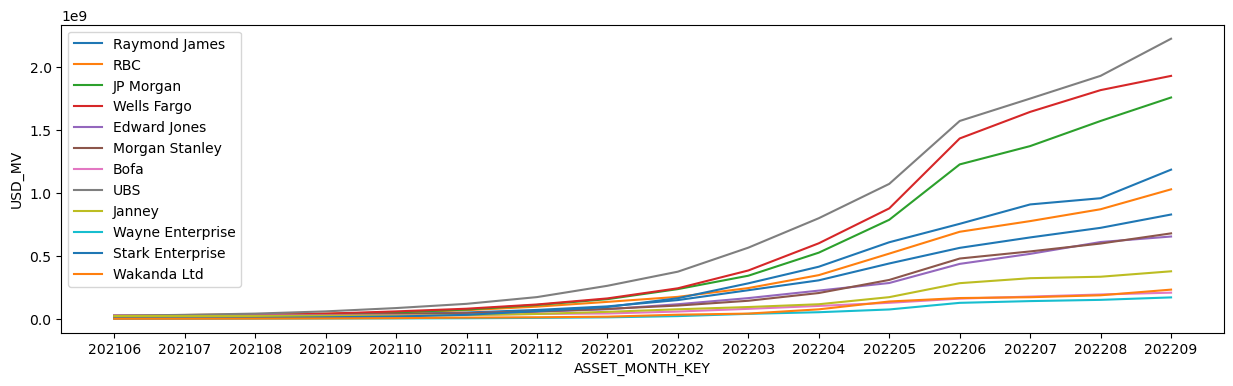

In [10]:
fig, ax = plt.subplots(figsize=(15,4))
for firm, DL in Data_Dict.items():
    sns.lineplot(data=DL, x='ASSET_MONTH_KEY', y='USD_MV', label=firm, ax=ax)
plt.legend()
plt.show()

### Insight 2: The asset price of all the firms has increased overall in the past 16 months. 

### Insight 3: Asset Price value of the firms arranged in descending order.

In [11]:
Asset_Details_With_Firms[Asset_Details_With_Firms['ASSET_MONTH_KEY']=='202209'].groupby('FIRM').sum('USD_MV').sort_values(by='USD_MV', ascending=False)

,CONTACT_ID,USD_MV,CONTACT ID,FIRM ID
FIRM,,,,
UBS,176453,2.226850e+09,176453,1238648
Wells Fargo,145600,1.931325e+09,145600,1028511
JP Morgan,158289,1.759560e+09,158289,1176120
Stark Enterprise,3369,1.185788e+09,3369,6000
RBC,162342,1.029316e+09,162342,1495860
Raymond James,189577,8.289937e+08,189577,1316700
Morgan Stanley,153073,6.791193e+08,153073,1044935
Edward Jones,163998,6.540463e+08,163998,1064770
Janney,163486,3.775579e+08,163486,1329570


In [12]:
AssDetFirms = Asset_Details_With_Firms
AssDetFirms.head()
AssDetFirms = pd.merge(Asset_Details_With_Firms, Advisors_Details, left_on='CONTACT_ID', right_on='CONTACT ID', how='left')

In [13]:
AssDetFirms.info()
AssDetFirms = AssDetFirms[['CONTACT_ID', 'ASSET_MONTH_KEY', 'USD_MV', 'FIRM', 'Industry EXP', 'Firm EXP']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15548 entries, 0 to 15547
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTACT_ID       15548 non-null  int64         
 1   ASSET_MONTH_KEY  15548 non-null  object        
 2   USD_MV           15548 non-null  float64       
 3   CONTACT ID_x     15548 non-null  int64         
 4   FIRM ID_x        15548 non-null  int64         
 5   FIRM             15548 non-null  object        
 6   CONTACT ID_y     15548 non-null  int64         
 7   NICK_NAME        15548 non-null  object        
 8   FIRST_NAME       15548 non-null  object        
 9   MIDDLE_NAME      112 non-null    object        
 10  LAST_NAME        15548 non-null  object        
 11  PREFIX           7088 non-null   object        
 12  SUFFIX           4344 non-null   object        
 13  MOBILE_PHONE     14932 non-null  object        
 14  FIRM ID_y        15548 non-null  int64

In [14]:
AssDetFirms.corr(numeric_only = True)

,CONTACT_ID,USD_MV,Industry EXP,Firm EXP
CONTACT_ID,1.000000,0.098530,0.012578,0.023689
USD_MV,0.098530,1.000000,0.007736,0.009611
Industry EXP,0.012578,0.007736,1.000000,0.605528
Firm EXP,0.023689,0.009611,0.605528,1.000000


* UBS is the company with the highest Asset Price.

# Transaction Details Data Set Exploration

In [15]:
# Take the data of a single firm and see the scatter plot between transaction date and transaction value.
TransDetFirms = pd.merge(Transaction_Details, Advisors_Firms, left_on='CONTACT_ID', right_on='CONTACT ID', how='left')
TransDetFirms.head()

,CONTACT_ID,TRADE_DATE_KEY,USD_AMT,TRADE_CLASS_CODE,CONTACT ID,FIRM ID,FIRM
0,1079,20220725,-2.832932e+04,R,1079,10389,Wells Fargo
1,1715,20211204,1.358365e+05,S,1715,12087,Janney
2,1866,20210725,1.730403e+05,R,1866,10089,Bofa
3,1698,20220522,5.311246e+07,S,1698,13980,RBC
4,1677,20210805,-1.583990e+05,R,1677,10089,Bofa


* The cells that follow take care of those values of transaction amount which is positive for Redemption and negative for sales.

In [16]:
print("Sales Transactions with negative amount")
print(TransDetFirms[(TransDetFirms['TRADE_CLASS_CODE']=='S') & (TransDetFirms['USD_AMT']<0)].shape)
print("Sales Transactions with postive amount")
print(TransDetFirms[(TransDetFirms['TRADE_CLASS_CODE']=='S') & (TransDetFirms['USD_AMT']>0)].shape)
print("Redemption Transactions with negative amount")
print(TransDetFirms[(TransDetFirms['TRADE_CLASS_CODE']=='R') & (TransDetFirms['USD_AMT']<0)].shape)
print("Redemption Transactions with positive amount")
print(TransDetFirms[(TransDetFirms['TRADE_CLASS_CODE']=='R') & (TransDetFirms['USD_AMT']>0)].shape)

Sales Transactions with negative amount
(1374, 7)
Sales Transactions with postive amount
(13646, 7)
Redemption Transactions with negative amount
(12087, 7)
Redemption Transactions with positive amount
(1476, 7)


In [17]:
TransDetFirms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28583 entries, 0 to 28582
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CONTACT_ID        28583 non-null  int64  
 1   TRADE_DATE_KEY    28583 non-null  int64  
 2   USD_AMT           28583 non-null  float64
 3   TRADE_CLASS_CODE  28583 non-null  object 
 4   CONTACT ID        28583 non-null  int64  
 5   FIRM ID           28583 non-null  int64  
 6   FIRM              28583 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.5+ MB


In [18]:
TransDetFirmsExp = pd.merge(TransDetFirms, Advisors_Details, left_on='CONTACT_ID', right_on='CONTACT ID', how='left')
TransDetFirmsExp.info()
TransDetFirmsExp = TransDetFirmsExp[['CONTACT_ID', 'TRADE_DATE_KEY', 'TRADE_CLASS_CODE', 'USD_AMT','FIRM ID_x', 'FIRM', 'Industry EXP', 'Firm EXP']]
TransDetFirmsExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28583 entries, 0 to 28582
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CONTACT_ID        28583 non-null  int64         
 1   TRADE_DATE_KEY    28583 non-null  int64         
 2   USD_AMT           28583 non-null  float64       
 3   TRADE_CLASS_CODE  28583 non-null  object        
 4   CONTACT ID_x      28583 non-null  int64         
 5   FIRM ID_x         28583 non-null  int64         
 6   FIRM              28583 non-null  object        
 7   CONTACT ID_y      28583 non-null  int64         
 8   NICK_NAME         28583 non-null  object        
 9   FIRST_NAME        28583 non-null  object        
 10  MIDDLE_NAME       199 non-null    object        
 11  LAST_NAME         28583 non-null  object        
 12  PREFIX            13022 non-null  object        
 13  SUFFIX            7945 non-null   object        
 14  MOBILE_PHONE      2746

In [19]:
TransDetFirmsExp.corr(numeric_only=True)

,CONTACT_ID,TRADE_DATE_KEY,USD_AMT,FIRM ID_x,Industry EXP,Firm EXP
CONTACT_ID,1.000000,0.014354,0.035547,0.000798,0.012162,0.026711
TRADE_DATE_KEY,0.014354,1.000000,0.053819,-0.003571,-0.003030,0.000023
USD_AMT,0.035547,0.053819,1.000000,-0.052908,-0.000459,0.001548
FIRM ID_x,0.000798,-0.003571,-0.052908,1.000000,-0.049576,-0.023113
Industry EXP,0.012162,-0.003030,-0.000459,-0.049576,1.000000,0.606557
Firm EXP,0.026711,0.000023,0.001548,-0.023113,0.606557,1.000000


In [20]:
TransDetFirms.groupby('FIRM').sum('USD_AMT')['USD_AMT']

FIRM
Bofa                1.247161e+08
Edward Jones        7.424975e+08
JP Morgan           1.800020e+09
Janney              3.430382e+08
Morgan Stanley      7.796268e+08
RBC                 9.111623e+08
Raymond James       8.866568e+08
Stark Enterprise    1.181785e+09
UBS                 2.216182e+09
Wakanda Ltd         2.270649e+08
Wayne Enterprise    1.470540e+08
Wells Fargo         2.264083e+09
Name: USD_AMT, dtype: float64

### Insight 4: All Companies have positive cash inflows. The highest Cash Inflow is for Wells Fargo. 

In [21]:
TransDetFirms.groupby(['FIRM']).sum('USD_AMT').sort_values("USD_AMT", ascending=False)

,CONTACT_ID,TRADE_DATE_KEY,USD_AMT,CONTACT ID,FIRM ID
FIRM,,,,,
Wells Fargo,4311492,58869465240,2.264083e+09,4311492,30252768
UBS,5528950,73566421195,2.216182e+09,5528950,38857242
JP Morgan,4596464,63053200631,1.800020e+09,4596464,33965910
Stark Enterprise,103257,1233214735,1.181785e+09,103257,183000
RBC,4893085,64711359937,9.111623e+08,4893085,44749980
Raymond James,5310270,71200424830,8.866568e+08,5310270,36804900
Morgan Stanley,4679314,63578969475,7.796268e+08,4679314,31906025
Edward Jones,4644543,60324533774,7.424975e+08,4644543,29974280
Janney,4398848,59212324589,3.430382e+08,4398848,35402823


From the above result we see that all the companies have "Positive inflow of Cash" overall. This is a good sign. Wells Fargo has the highest cash inflow

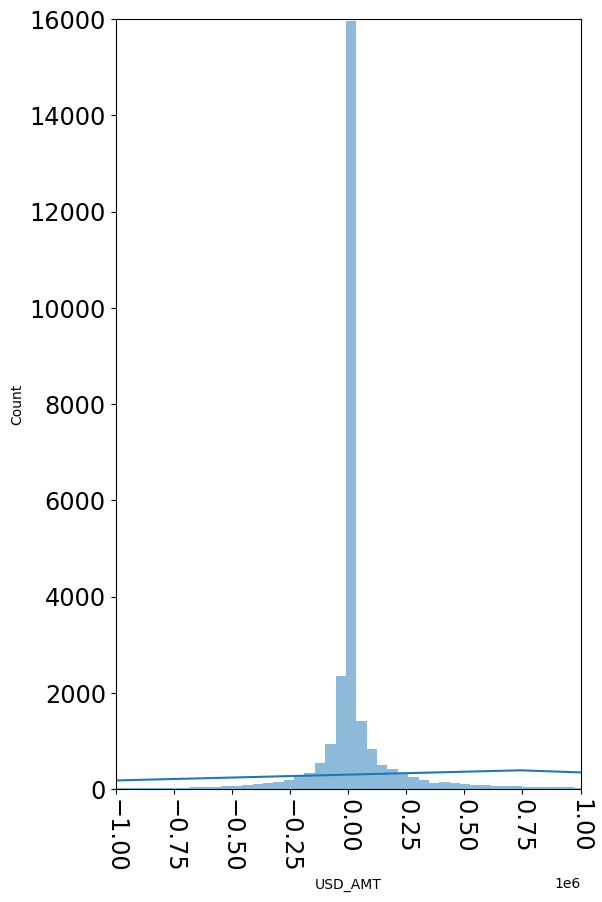

In [22]:
# Histogram for USD_AMT in TransDetFirms
plt.figure(figsize=(6,10), dpi=100)
sns.histplot(data=TransDetFirms, x='USD_AMT', bins=10000, kde=True)
plt.xlim(-1e+6, 1e+6)
plt.xticks(fontsize='xx-large', rotation = 270)
plt.ylim(0,16000)
plt.yticks(fontsize='xx-large')
plt.show()

* Though the maximum value of "USD_AMT" as we shall see later is way going up till 1e+9, significant number of transactions are in a smaller belt.

### Insight 5: The Histogram for USD_AMT shows how most of the Transaction Amount values are in a very short range.
* Looking at the first five values of Transaction_Details Dataset, the values were too high to happen in a single transaction. But they were negligible. Most of the values are actually in a practical range.

In [49]:
TransDetFirms['FIRM'].value_counts()

FIRM
UBS                 3639
Raymond James       3522
RBC                 3201
Morgan Stanley      3145
JP Morgan           3119
Bofa                3001
Edward Jones        2984
Janney              2929
Wells Fargo         2912
Stark Enterprise      61
Wakanda Ltd           36
Wayne Enterprise      34
Name: count, dtype: int64

In [50]:
TransDetFirms[TransDetFirms['FIRM']=='Wayne Enterprise']

,CONTACT_ID,TRADE_DATE_KEY,USD_AMT,TRADE_CLASS_CODE,CONTACT ID,FIRM ID,FIRM
755,1398,20220213,-1.368044e+06,R,1398,2018,Wayne Enterprise
1390,1398,20220325,8.481875e+05,S,1398,2018,Wayne Enterprise
1532,1398,20211006,7.481653e+05,S,1398,2018,Wayne Enterprise
2342,1398,20220528,2.139140e+07,S,1398,2018,Wayne Enterprise
2865,1398,20220726,-3.040542e+07,R,1398,2018,Wayne Enterprise
3181,1398,20220916,-1.504688e+07,R,1398,2018,Wayne Enterprise
4063,1398,20220425,-2.353720e+06,R,1398,2018,Wayne Enterprise
4823,1398,20211130,1.175980e+06,S,1398,2018,Wayne Enterprise
5158,1398,20210721,4.471918e+05,R,1398,2018,Wayne Enterprise
5477,1398,20220813,6.328127e+07,S,1398,2018,Wayne Enterprise


### Insight 6: Above result shows the number of transactions of firms arranged in descending order.

Some Statistics of Transaction Amount:<br>
We Made two box plots to analyze better - one for positive values of 'USD_AMT' and the other for negative values of 'USD_AMT' <br>
Also included are the maximum, minimum, median and mean values of the above two parts of the data to get an idea of the size of the transaction amount values.

Min: 1.7053025658242404e-13
Max: 287652790.587015
Median: 18540.644635089688
Mean 1244105.0901618202


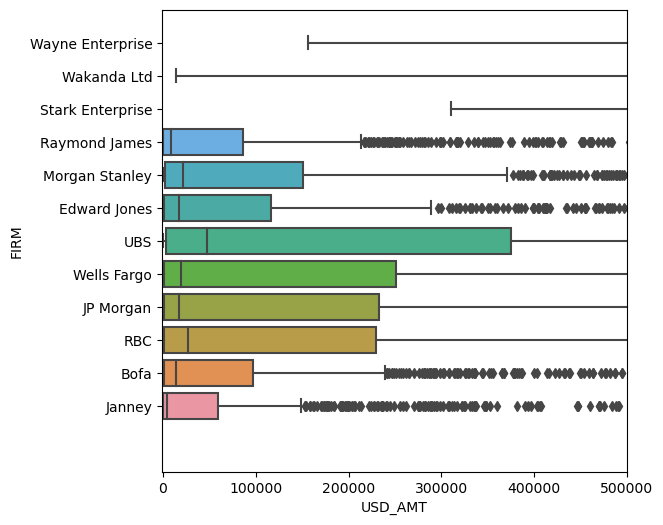

In [25]:
# Postive values of transaction amount
print("Min:", TransDetFirms[TransDetFirms['USD_AMT']>0]['USD_AMT'].min())
print("Max:", TransDetFirms[TransDetFirms['USD_AMT']>0]['USD_AMT'].max())
print("Median:", TransDetFirms[TransDetFirms['USD_AMT']>0]['USD_AMT'].median())
print("Mean", TransDetFirms[TransDetFirms['USD_AMT']>0]['USD_AMT'].mean())

plt.figure(figsize=(6,6), dpi=100)
sns.boxplot(data=TransDetFirms[TransDetFirms['USD_AMT']>0], x='USD_AMT', y='FIRM')
plt.xlim(-1e+3,5e+5)
plt.ylim(-2,12)
plt.show()

Min: -158403704.63882226
Max: -1.3358203432289883e-12
Median: -4952.710923245569
Mean -534096.2503870082


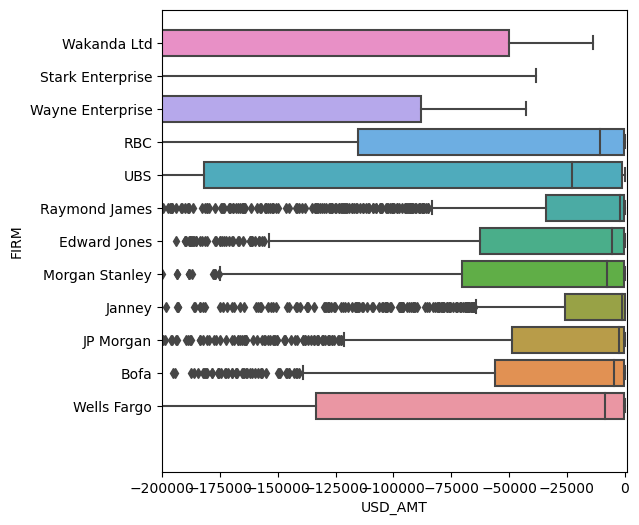

In [30]:
# Negative Values of transaction amount
print("Min:", TransDetFirms[TransDetFirms['USD_AMT']<0]['USD_AMT'].min())
print("Max:", TransDetFirms[TransDetFirms['USD_AMT']<0]['USD_AMT'].max())
print("Median:", TransDetFirms[TransDetFirms['USD_AMT']<0]['USD_AMT'].median())
print("Mean", TransDetFirms[TransDetFirms['USD_AMT']<0]['USD_AMT'].mean())

plt.figure(figsize=(6,6), dpi=100)
sns.boxplot(data=TransDetFirms[TransDetFirms['USD_AMT']<0], x='USD_AMT', y='FIRM')
plt.xlim(-2e+5,1e+3)
plt.ylim(-2,12)
plt.show()

### Insight 7: The above two box plots show three unusually high investing companies Wakanda Ltd, Stark Enterprise, Wayne Enterprise. These companies deal with huge money. But their overall asset price is not high. This is because their inflow is huge and their redemption is also big. The difference matters when pricing the assets.

# <u>Exploring the Activty_Details Dataset:</u>

In [31]:
Activity_Details.head()

,CONTACT_ID,ACTIVITY TYPE,ACTIVITY DATE,ACTIVITY DATE KEY
0,1153,PhoneCall,2022-06-02,20220602
1,1129,Note,2022-06-22,20220622
2,1700,Note,2022-07-21,20220721
3,1978,Email,2021-09-28,20210928
4,1978,FollowUp,2022-03-16,20220316


* The basic information of each column in the following cell.

In [32]:
Activity_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17308 entries, 0 to 17307
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CONTACT_ID         17308 non-null  int64         
 1   ACTIVITY TYPE      17308 non-null  object        
 2   ACTIVITY DATE      17308 non-null  datetime64[ns]
 3   ACTIVITY DATE KEY  17308 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 541.0+ KB


In [33]:
def month_key(date_key):
    date_key = str(date_key)
    return date_key[0:6]
Activity_Details['MONTH_KEY'] = Activity_Details['ACTIVITY DATE KEY'].apply(month_key)

Count of differnt types of Activities

In [34]:
Activity_Details['ACTIVITY TYPE'].value_counts()

ACTIVITY TYPE
Message           1843
VoiceMail         1834
Note              1792
Meeting           1792
FollowUp          1789
Seminar           1770
Email             1759
PhoneCall         1709
SurveyResponse    1611
ConferenceCall    1409
Name: count, dtype: int64

### Insight 8: Message and VoiceMail is the most used modes of communication by the Sales Team followed by VoiceMail.

# Advisors Details Data Set Exploration

In [35]:
# Merging the Firm Details and Advisors Details Dataset.
AdvDetFirms = pd.merge(Advisors_Details, Firm_Details, on='FIRM ID', how='left')
AdvDetFirms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CONTACT ID      1000 non-null   int64         
 1   NICK_NAME       1000 non-null   object        
 2   FIRST_NAME      1000 non-null   object        
 3   MIDDLE_NAME     7 non-null      object        
 4   LAST_NAME       1000 non-null   object        
 5   PREFIX          457 non-null    object        
 6   SUFFIX          278 non-null    object        
 7   MOBILE_PHONE    960 non-null    object        
 8   FIRM ID         1000 non-null   int64         
 9   PRIMARY_EMAIL   945 non-null    object        
 10  UNSUBSCRIBED    945 non-null    object        
 11  STREET_1        1000 non-null   object        
 12  CITY            1000 non-null   object        
 13  STATE           1000 non-null   object        
 14  ZIP             1000 non-null   int64         
 15  COUNT

In [36]:
AdvDetFirms = AdvDetFirms.loc[:, ['CONTACT ID', 'FIRM ID', 'CITY', 'STATE', 'ZIP', 'COUNTRY', 'SEGMENT', 'Industry EXP', 'Firm EXP', 'FIRM']]

In [37]:
AdvDetFirms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CONTACT ID    1000 non-null   int64 
 1   FIRM ID       1000 non-null   int64 
 2   CITY          1000 non-null   object
 3   STATE         1000 non-null   object
 4   ZIP           1000 non-null   int64 
 5   COUNTRY       1000 non-null   object
 6   SEGMENT       1000 non-null   object
 7   Industry EXP  1000 non-null   int64 
 8   Firm EXP      1000 non-null   int64 
 9   FIRM          1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


* The following two box plots are for the Industry Experience and the number of years Advisors have spent in a particular firm.

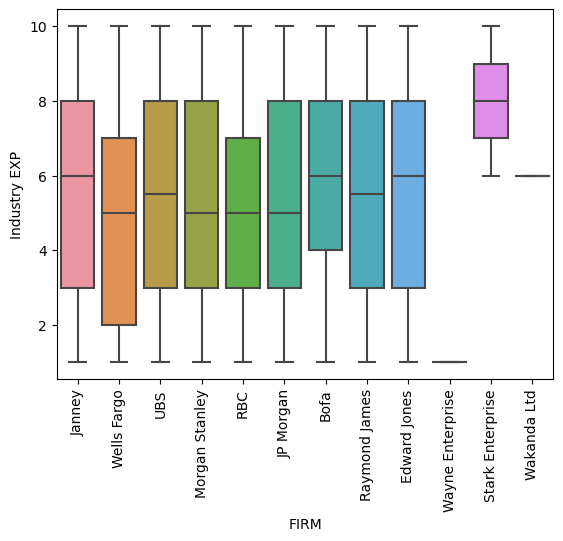

In [38]:
sns.boxplot(data=AdvDetFirms, x='FIRM', y='Industry EXP')
plt.xticks(rotation='vertical')
plt.show()

### Insight 9: Bofa seems to have more experienced people compared to other companies.

As "Wayne Enterprise", "Stark Enterprise" and "Wakanda Ltd" have boxplots quite different from others, we try to see the advisors in those companies. It turns out that there is <u>only one</u> advisor in Wakanda Ltd and Wayne Enterprise. There are two advisors in Stark Enterprise.

In [39]:
print("Stark Enterprise")
print(AdvDetFirms[AdvDetFirms['FIRM']=='Stark Enterprise'])
print("\nWakanda Ltd")
print(AdvDetFirms[AdvDetFirms['FIRM']=='Wakanda Ltd'])
print("\nWayne Enterprise")
print(AdvDetFirms[AdvDetFirms['FIRM']=='Wayne Enterprise'])

Stark Enterprise
     CONTACT ID  FIRM ID         CITY      STATE    ZIP COUNTRY SEGMENT  \
516        1517     3000  Santa Clara     Oregon  46814     USA     HNW   
851        1852     3000      Killeen  Louisiana  64598     USA     HNW   

     Industry EXP  Firm EXP              FIRM  
516            10         6  Stark Enterprise  
851             6         3  Stark Enterprise  

Wakanda Ltd
     CONTACT ID  FIRM ID    CITY    STATE    ZIP COUNTRY SEGMENT  \
600        1601     2022  Austin  Arizona  57754     USA     HNW   

     Industry EXP  Firm EXP         FIRM  
600             6         4  Wakanda Ltd  

Wayne Enterprise
     CONTACT ID  FIRM ID    CITY STATE    ZIP       COUNTRY SEGMENT  \
397        1398     2018  Joliet  Guam  28516  United State     HNW   

     Industry EXP  Firm EXP              FIRM  
397             1         1  Wayne Enterprise  


In [48]:
AdvDetFirms[AdvDetFirms['FIRM']=='Wakanda Ltd']


,CONTACT ID,FIRM ID,CITY,STATE,ZIP,COUNTRY,SEGMENT,Industry EXP,Firm EXP,FIRM
600,1601,2022,Austin,Arizona,57754,USA,HNW,6,4,Wakanda Ltd


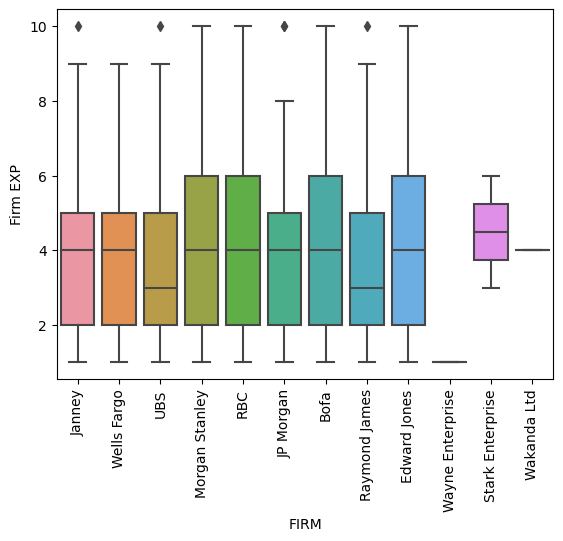

In [40]:
sns.boxplot(data=AdvDetFirms, x='FIRM', y='Firm EXP')
plt.xticks(rotation='vertical')
plt.show()

### Insight 10: Morgan Stanley, RBC, Bofa, Edward Jones seem to be companies that, sort of, able to hold employees for long. Others do not have much employees experienced in thier own Firms. Bofa even has highest number of experienced employees.

In [41]:
AdvDetFirms.groupby('FIRM')['CONTACT ID'].count().sort_values(ascending=False)

FIRM
Raymond James       132
UBS                 116
Janney              111
JP Morgan           110
RBC                 109
Edward Jones        108
Bofa                106
Morgan Stanley      105
Wells Fargo          99
Stark Enterprise      2
Wakanda Ltd           1
Wayne Enterprise      1
Name: CONTACT ID, dtype: int64

### Insight 11: Raymond James stands with the higest number of Advisors.

In [32]:
AdvDetFirms['SEGMENT'].value_counts()

SEGMENT
Uncovered               361
Business Development    325
Field                   294
Internal                 16
HNW                       4
Name: count, dtype: int64

### Insight 12: The highest number of Advisors are in Uncovered and Business Development Segment.

In [54]:
AdvDetFirms['COUNTRY'].value_counts()
AdvDetFirms[AdvDetFirms['FIRM']=='Wayne Enterprise']

,CONTACT ID,FIRM ID,CITY,STATE,ZIP,COUNTRY,SEGMENT,Industry EXP,Firm EXP,FIRM
397,1398,2018,Joliet,Guam,28516,United State,HNW,1,1,Wayne Enterprise
